In [1]:
import pandas as pd
import seaborn as sns
import csv

In [2]:
df=pd.read_feather('data.feather')
input_df=pd.read_csv('../cities.csv', sep=';', quoting=csv.QUOTE_NONNUMERIC, quotechar='\'')


In [3]:
pd.pivot_table(data=df,
                           values=["Kurvigkeit", "Distanz"],
                           index=["Stadt", 'Spurweite'],
                           aggfunc={'Kurvigkeit': 'mean', 'Distanz': ('sum', 'mean')})

Distanz               Kurvigkeit
                              mean          sum        mean
Stadt         Spurweite                                    
Berlin        1000.0     10.914380    10.914380  130.719676
              1435.0     11.222666  1111.043920  131.365233
Brno          1435.0     10.323065   289.045813  176.768461
Budapest      1435.0     11.455387  1729.763435   94.054033
Gmunden       1000.0      2.828363     5.656726  342.188275
Graz          1435.0      7.774837   108.847713  273.430890
Innsbruck     1000.0      6.223142    87.123988  315.598981
Linz          900.0      13.335696   160.028352  194.605447
Mailand       1445.0      9.257184   324.001434  179.377385
München       1435.0      8.583994   394.863702  175.375552
Prag          1435.0     16.330730  1224.804734  165.665692
San Francisco 1067.0      2.679947    16.079681   99.077549
              1435.0     11.644135   163.017889   77.401544
Wien          1435.0      7.660184   543.873055  191.187581

In [4]:
pd.pivot_table(data=df, values=["Kurvigkeit", "Distanz"], index="Spurweite", aggfunc='mean')

,Distanz,Kurvigkeit
Spurweite,,
900.0,13.335696,194.605447
1000.0,6.099711,307.851880
1067.0,2.679947,99.077549
1435.0,11.175221,142.841383
1445.0,9.257184,179.377385


<Axes: xlabel='Spurweite', ylabel='Kurvigkeit'>

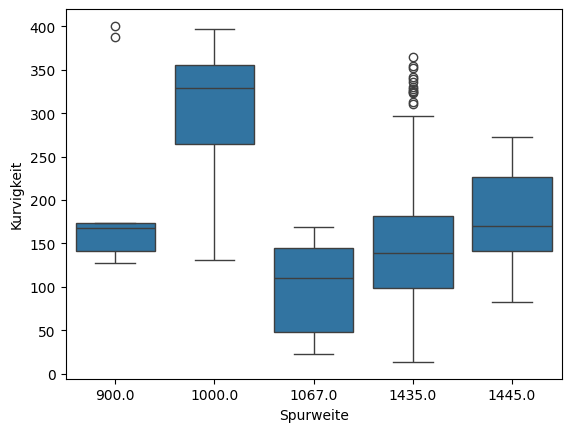

In [5]:
sns.boxplot(data=df, y='Kurvigkeit', x='Spurweite', orient='v')


<Axes: xlabel='Kurvigkeit', ylabel='Stadt'>

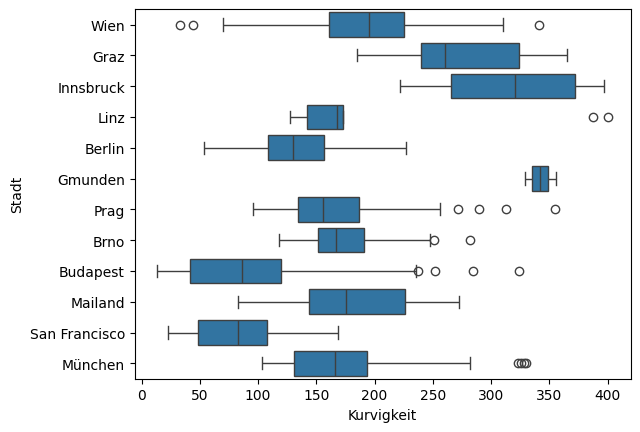

In [6]:
sns.boxplot(data=df, x='Kurvigkeit', y='Stadt', orient='h')

<Axes: xlabel='Kurvigkeit', ylabel='Geschwindigkeit'>

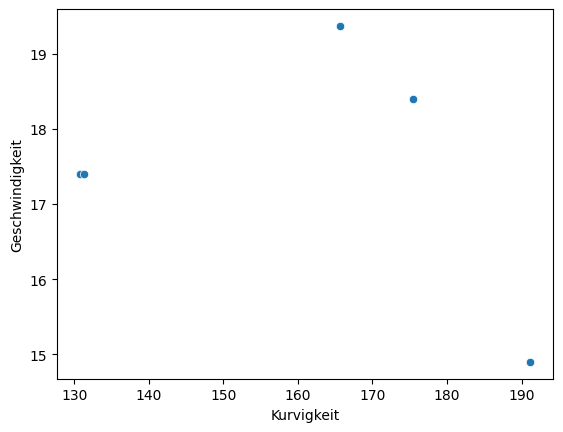

In [7]:
pt_cities=pd.pivot_table(data=df,
                           values=["Kurvigkeit", "Distanz"],
                           index=["Stadt", 'Spurweite'],
                           aggfunc={'Kurvigkeit': 'mean', 'Distanz': 'mean'})
merged_df=pd.merge(pt_cities, input_df, on='Stadt').drop(['Sued', 'West', 'Ost', 'Nord' ,'RailModes'], axis='columns')
sns.scatterplot(data=merged_df, x='Kurvigkeit', y='Geschwindigkeit')

In [8]:
merged_df

,Stadt,Distanz,Kurvigkeit,Geschwindigkeit
0,Berlin,10.914380,130.719676,17.40
1,Berlin,11.222666,131.365233,17.40
2,Brno,10.323065,176.768461,NaN
3,Budapest,11.455387,94.054033,NaN
4,Gmunden,2.828363,342.188275,NaN
5,Graz,7.774837,273.430890,NaN
6,Innsbruck,6.223142,315.598981,NaN
7,Linz,13.335696,194.605447,NaN
8,Mailand,9.257184,179.377385,NaN
9,München,8.583994,175.375552,18.40
